In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YohanWijaya10/barulagi/main/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah%20(4).csv')
print(df)

      Area Category       Nama Daerah  Luas Tanah (m2)  Luas Bangunan (m2)  \
0               NaN               NaN              NaN                 NaN   
1    Below Standard  Setro Baru Utara             30.0                60.0   
2          Standard          Kenjeran            170.0               170.0   
3    Sangat Premium          Kenjeran            187.0               250.0   
4           Premium          Kenjeran            350.0               600.0   
..              ...               ...              ...                 ...   
303        Standard       Gununganyar             47.0                34.0   
304  Sangat Premium          Sukolilo            300.0               212.0   
305         Premium         Mulyorejo            102.0               156.0   
306        Standard          Sukolilo             98.0               170.0   
307  Below Standard        Teuku Umar            193.0               300.0   

     Jumlah Kamar  Jumlah Kamar Mandi  Tingkat/Lantai   \
0    

In [2]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer

# strategy menggunakan mean
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [4]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [5]:
import numpy as np
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].apply(np.int64)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].apply(np.int64)
df['Jumlah Kamar'] = df['Jumlah Kamar'].apply(np.int64)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].apply(np.int64)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].apply(np.int64)



In [6]:
df.dtypes

Area Category                    object
Nama Daerah                      object
Luas Tanah (m2)                   int64
Luas Bangunan (m2)                int64
Jumlah Kamar                      int64
Jumlah Kamar Mandi                int64
Tingkat/Lantai                    int64
Harga Penawaran (dari Owner)     object
Terjual/Belum                    object
Arah Hadap Rumah                 object
Posisi Rumah                     object
Lebar Jalan Depan Rumah (ROW)    object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['Area Category'] = lb.fit_transform(df['Area Category'])
df['Nama Daerah'] = lb.fit_transform(df['Nama Daerah'])
df['Harga Penawaran (dari Owner)'] = lb.fit_transform(df['Harga Penawaran (dari Owner)'])
df['Terjual/Belum'] = lb.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = lb.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = lb.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])


In [8]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dfscaling = scale.fit_transform(df)
dfscaling

array([[ 1.00437212, -1.37074241,  0.0647599 , ...,  0.83949741,
        -0.18806854, -0.8255808 ],
       [-1.67782395,  1.04750903, -0.97745709, ...,  0.83949741,
        -0.18806854,  0.22083437],
       [ 1.00437212, -0.36540192, -0.28264577, ..., -1.14184513,
        -5.4539876 , -0.8255808 ],
       ...,
       [-0.78375859,  0.31388219, -0.62012555, ..., -1.14184513,
        -0.18806854, -0.8255808 ],
       [ 1.00437212,  1.18336586, -0.63997731, ...,  0.83949741,
        -0.18806854,  1.26724954],
       [-1.67782395,  1.50942223, -0.16849819, ...,  0.83949741,
        -0.18806854,  1.26724954]])

# Kmeans

In [9]:
from sklearn.cluster import KMeans
kmeans_kwargs = {"init": "k-means++","n_init": 10,"max_iter": 300,"random_state": 42}
sse = []
# check the inertia for each K
for k in range(1, 11):
    kmeansmodel = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeansmodel.fit(dfscaling)
    sse.append(kmeansmodel.inertia_)

C:\Users\Yohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


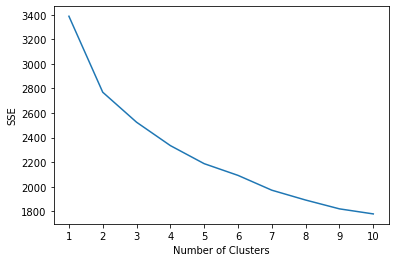

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [12]:
kmeans = KMeans(n_clusters=4,init="random").fit(dfscaling)
sse.append(kmeansmodel.inertia_)

In [13]:
df_kmeans = kmeans.predict(dfscaling)
df["Cluster"]=df_kmeans

In [14]:
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3,11,240,300,4,3,2,94,0,3,2,0,1
1,0,100,30,60,2,1,2,79,0,3,2,1,0
2,3,48,170,170,5,4,2,74,0,1,0,0,1
3,2,48,187,250,5,5,2,84,0,3,2,0,3
4,1,48,350,600,5,5,2,124,0,0,2,0,3


In [15]:
df['Cluster'] = df_kmeans
df.groupby("Cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_mandi = ('Jumlah Kamar Mandi','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)', 'mean'),
                                 Terjual_Belum = ('Terjual/Belum', pd.Series.mode),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode),
                                 Posisi_Rumah = ('Posisi Rumah', pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                 Count = ("Cluster",'count'))

ValueError: Must produce aggregated value

# Hierarchical

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

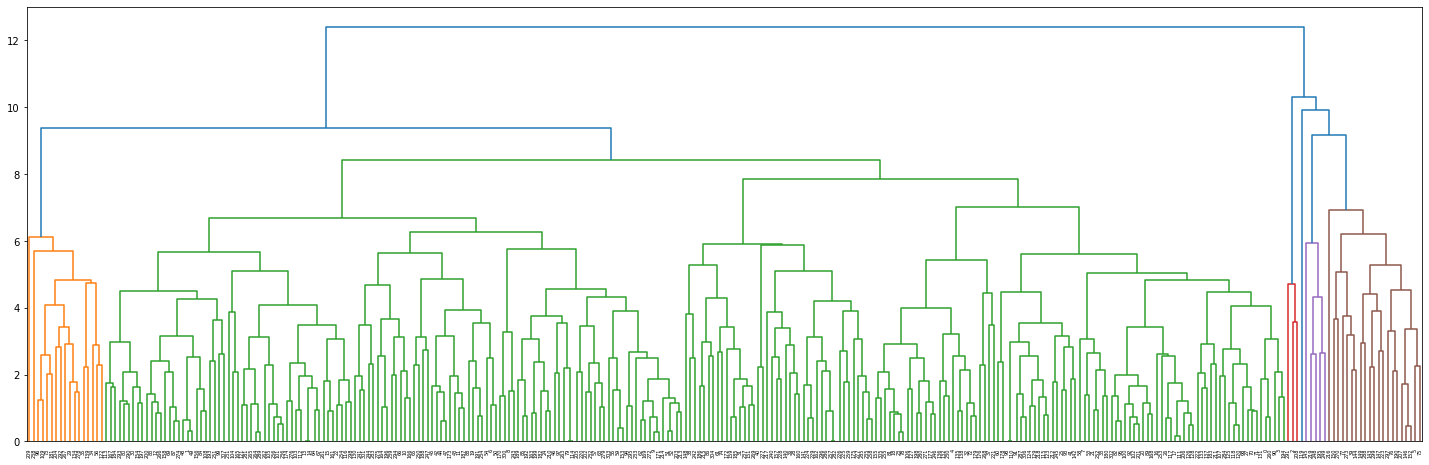

In [18]:
plt.figure(figsize=(25,8))
linkage_data = linkage(dfscaling, method='complete')
dendrogram(linkage_data)
plt.show()

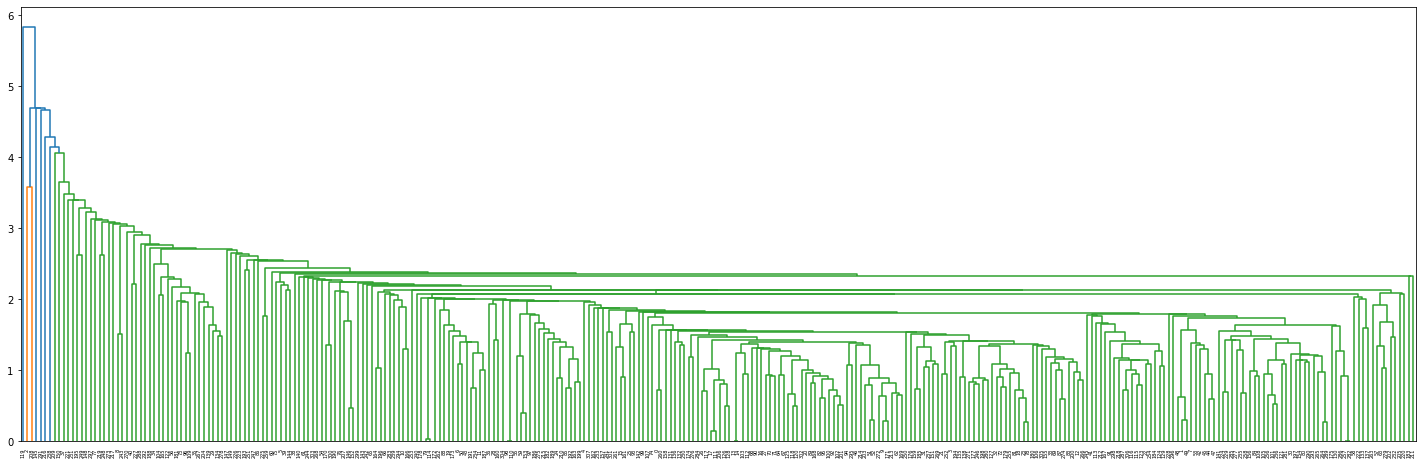

In [19]:
plt.figure(figsize=(25,8))
linkage_data = linkage(dfscaling, method='single')
dendrogram(linkage_data)
plt.show()

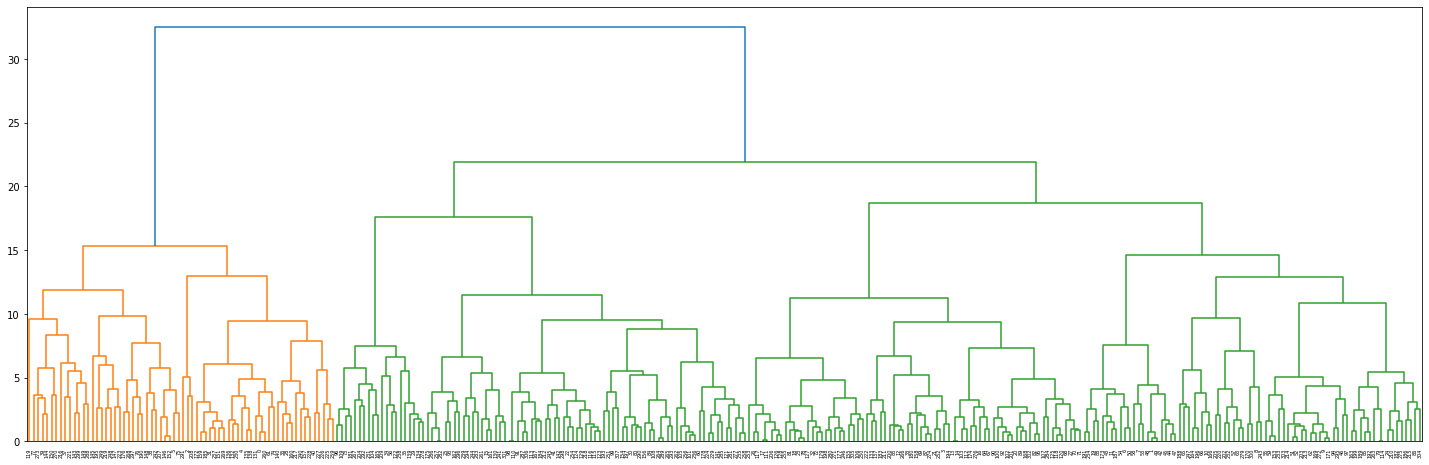

In [20]:
plt.figure(figsize=(25,8))
linkage_data = linkage(dfscaling, method='ward')
dendrogram(linkage_data)
plt.show()

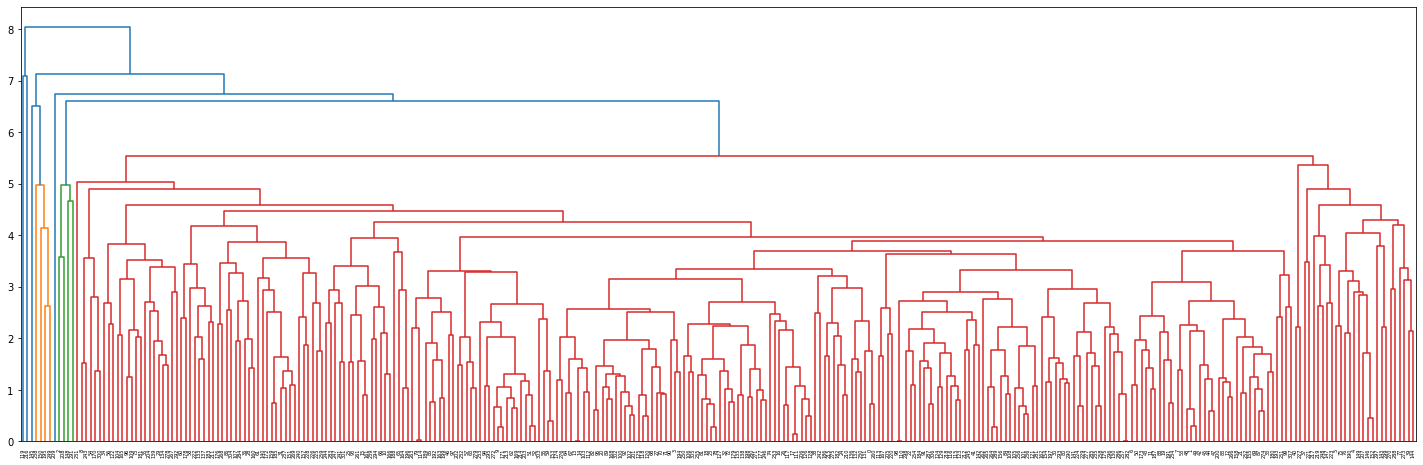

In [21]:
plt.figure(figsize=(25,8))
linkage_data = linkage(dfscaling, method='average')
dendrogram(linkage_data)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
labels = hierarchical_cluster.fit_predict(dfscaling)
print(labels)

In [ ]:
df['KMeans_Clusters'] = labels
df.groupby("KMeans_Clusters").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum','mean'),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah','mean'),
                                 Posisi_Rumah = ('Posisi Rumah','mean'),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)','mean'),
                                 Count = ("KMeans_Clusters",'count'))